In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file_path = "/mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250725T0716_ALL_Tile_0_0_e314.tif"

In [9]:
dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
if dataset is None:
    raise Exception("Failed to open file!")

# Reading metadata
print("Driver:", dataset.GetDriver().ShortName, "/", dataset.GetDriver().LongName)
print("Raster size:", dataset.RasterXSize, "x", dataset.RasterYSize)
print("Number of bands:", dataset.RasterCount)

Driver: GTiff / GeoTIFF
Raster size: 2400 x 1991
Number of bands: 14


In [10]:
num_bands = dataset.RasterCount
bands_data = np.array([dataset.GetRasterBand(i+1).ReadAsArray() for i in range(num_bands)])

Band 3 dimension is: (1991, 2400)
Band 2 dimension is: (1991, 2400)
Band 1 dimension is: (1991, 2400)


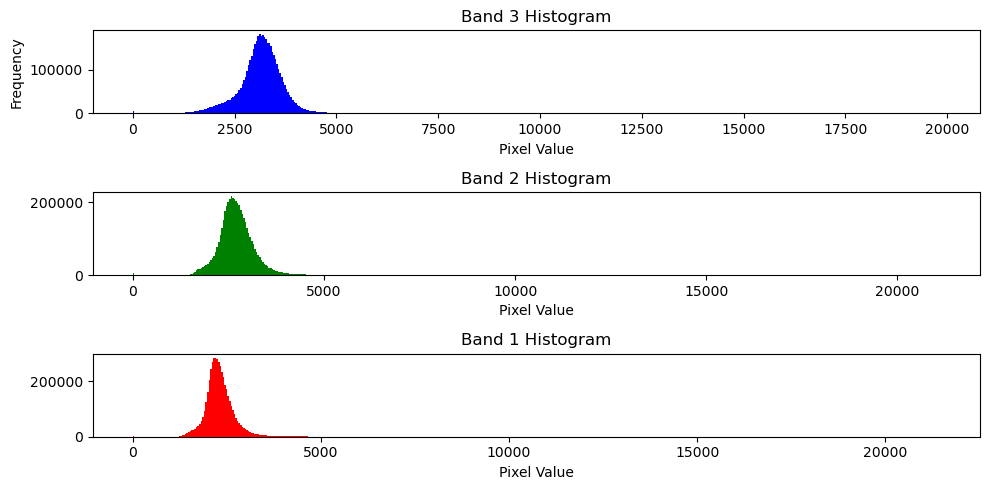

In [87]:
i = 3 # Red channel
j = 2 # Green channel
k = 1 # Blue channel

plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.hist(bands_data[i].flatten(), bins=512, color='blue')
plt.title(f"Band {i} Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
print(f'Band {i} dimension is: {bands_data[i].shape}')
plt.subplot(3,1,2)
plt.hist(bands_data[j].flatten(), bins=512, color='green')
plt.title(f"Band {j} Histogram")
plt.xlabel("Pixel Value")
print(f"Band {j} dimension is: {bands_data[j].shape}")
plt.subplot(3,1,3)
plt.hist(bands_data[k].flatten(), bins=512, color='red')
plt.title(f"Band {k} Histogram")
plt.xlabel("Pixel Value")
print(f"Band {k} dimension is: {bands_data[k].shape}")
plt.tight_layout()
plt.show()

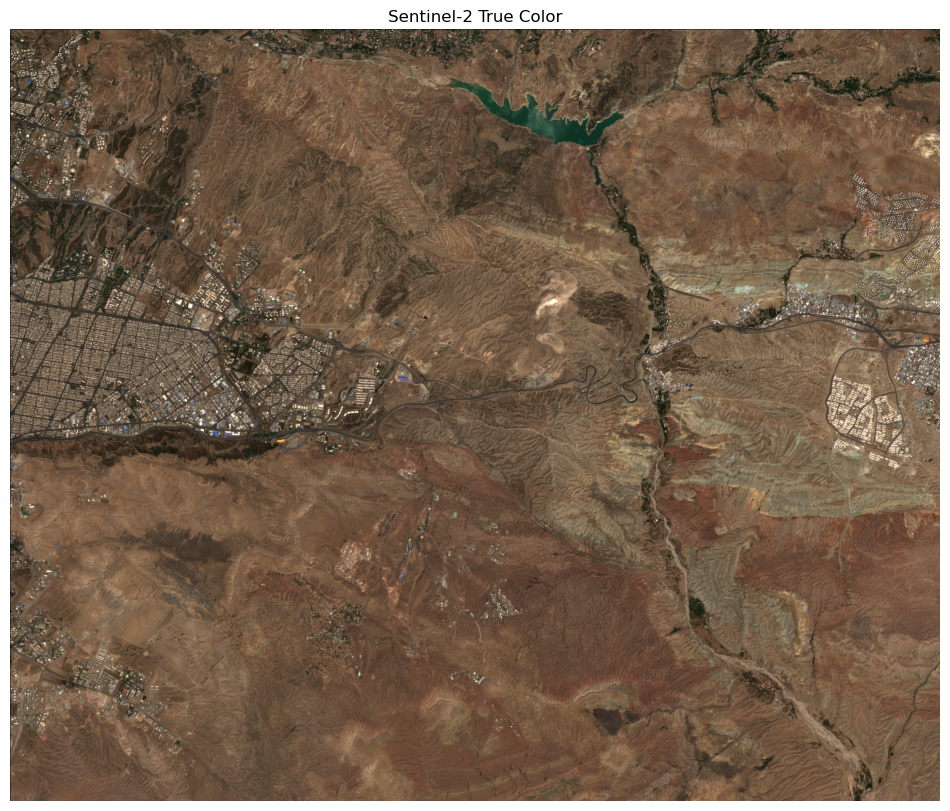

In [90]:
rgb_img = bands_data[[i, j, k], :, :].astype(np.float32)
rgb_img = np.moveaxis(rgb_img, 0, -1)
rgb_stretched = np.clip((rgb_img - 1000) / (6000 - 1000), 0, 1)
plt.figure(figsize=(12, 12))
plt.imshow(rgb_stretched)
plt.title("Sentinel-2 True Color")
plt.axis("off")
plt.show()

(500, 500, 3)


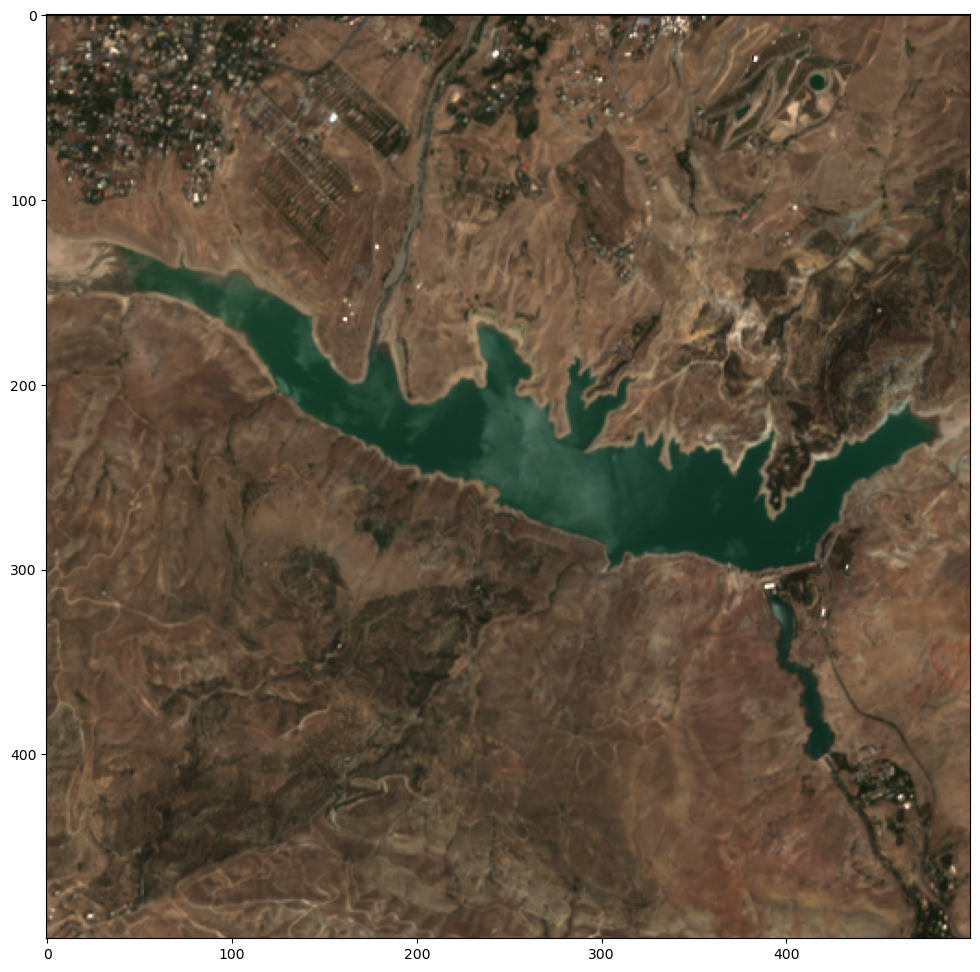

In [89]:
rgb_img_cropped = rgb_stretched[0:500,1100:1600].copy()
print(rgb_img_cropped.shape)
plt.figure(figsize=(12, 12))
plt.imshow(rgb_img_cropped)
plt.show()